In [19]:
import requests as req
import json as json
import pandas as pd

In [2]:
url = "http://baseballhistoryapi.azurewebsites.net/TeamFranchises"

In [3]:
francdata = req.get(url)

In [4]:
francdata

<Response [200]>

In [5]:
fdata = francdata.json()

In [6]:
fdata

{'@odata.context': 'http://baseballhistoryapi.azurewebsites.net/$metadata#TeamFranchises',
 '@odata.nextLink': 'http://baseballhistoryapi.azurewebsites.net/TeamFranchises?$skip=100',
 'value': [{'NAassoc': None,
   'active': 'N',
   'franchID': 'ALT',
   'franchName': 'Altoona Mountain City'},
  {'NAassoc': None,
   'active': 'Y',
   'franchID': 'ANA',
   'franchName': 'Los Angeles Angels of Anaheim'},
  {'NAassoc': None,
   'active': 'Y',
   'franchID': 'ARI',
   'franchName': 'Arizona Diamondbacks'},
  {'NAassoc': 'PNA',
   'active': 'N',
   'franchID': 'ATH',
   'franchName': 'Philadelphia Athletics'},
  {'NAassoc': 'BNA',
   'active': 'Y',
   'franchID': 'ATL',
   'franchName': 'Atlanta Braves'},
  {'NAassoc': None,
   'active': 'Y',
   'franchID': 'BAL',
   'franchName': 'Baltimore Orioles'},
  {'NAassoc': None,
   'active': 'N',
   'franchID': 'BFB',
   'franchName': 'Buffalo Bisons'},
  {'NAassoc': None,
   'active': 'N',
   'franchID': 'BFL',
   'franchName': 'Buffalo Bisons'},

In [11]:
for x in fdata['value']:
    print(x['franchID'])
    print(x['franchName'],"\n")

ALT
Altoona Mountain City 

ANA
Los Angeles Angels of Anaheim 

ARI
Arizona Diamondbacks 

ATH
Philadelphia Athletics 

ATL
Atlanta Braves 

BAL
Baltimore Orioles 

BFB
Buffalo Bisons 

BFL
Buffalo Bisons 

BLC
Baltimore Canaries 

BLO
Baltimore Orioles 

BLT
Baltimore Terrapins 

BLU
Baltimore Monumentals 

BNA
Boston Red Stockings 

BOS
Boston Red Sox 

BRA
Brooklyn Atlantics 

BRD
Boston Reds 

BRG
Brooklyn Gladiators 

BRS
Boston Reds 

BTT
Brooklyn Tip-Tops 

BUF
Buffalo Bisons 

BWW
Brooklyn Ward's Wonders 

CBK
Columbus Buckeyes 

CBL
Cleveland Blues 

CEN
Philadelphia Centennials 

CFC
Cleveland Forest Citys 

CHC
Chicago Cubs 

CHH
Chicago Whales 

CHP
Chicago Pirates 

CHW
Chicago White Sox 

CIN
Cincinnati Reds 

CKK
Cincinnati Kelly's Killers 

CLE
Cleveland Indians 

CLI
Cleveland Infants 

CLS
Columbus Solons 

CLV
Cleveland Spiders 

CNA
Chicago White Stockings 

CNR
Cincinnati Reds 

COL
Colorado Rockies 

COR
Cincinnati Outlaw Reds 

CPI
Chicago/Pittsburgh (Union Leagu

In [27]:
#Get 2006-2016 data for Detroit Tigers
yearID = 2006
url = "http://baseballhistoryapi.azurewebsites.net/Teams(teamID='DET',lgID='AL',yearID=" + str(yearID) + ")"
bigdatas = []
for x in range (0,11):
    yearID = 2006
    yearID = yearID + x
    url = "http://baseballhistoryapi.azurewebsites.net/Teams(teamID='DET',lgID='AL',yearID=" + str(yearID) + ")"
    tdata = req.get(url)
    teamdata = tdata.json()
    bigdatas.append(teamdata)
#     print(teamdata)

year = []
wins = []
loss = []
homeruns = []
walks = []
strikeouts = []
stolenbases = []

for y in bigdatas:
    year.append(y['yearID'])
    wins.append(y['W'])
    loss.append(y['L'])
    homeruns.append(y['HR'])
    walks.append(y['BB'])
    strikeouts.append(y['SO'])
    stolenbases.append(y['SB'])

tigerframe = pd.DataFrame({
    'year': year,
    'wins': wins,
    'loss': loss,
    'homeruns': homeruns,
    'walks': walks,
    'strikeouts': strikeouts,
    'stolenbases': stolenbases
})

In [28]:
tigerframe

,homeruns,loss,stolenbases,strikeouts,walks,wins,year
0,203,67,60,1133,430,95,2006
1,177,74,103,1054,474,88,2007
2,200,88,63,1076,572,74,2008
3,183,77,72,1114,540,86,2009
4,152,81,69,1147,546,81,2010
5,169,67,49,1143,521,95,2011
6,163,74,59,1103,511,88,2012
7,176,69,35,1073,531,93,2013
8,155,72,106,1144,443,90,2014
9,151,87,83,1259,455,74,2015


In [33]:
import matplotlib.pyplot as plt

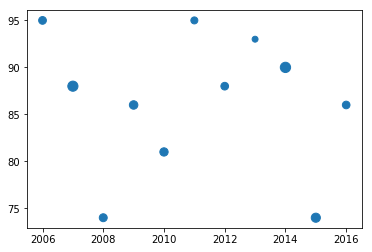

In [38]:
plt.scatter(tigerframe['year'], tigerframe['wins'], s=stolenbases)
plt.show()